In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [57]:
# Load the image
image = cv2.imread('C:\\Users\\DELL\\Pictures\\asiff.jpg')
image = cv2.resize(image, (720, 640))

In [58]:
# Load the models
faceNet = cv2.dnn.readNet('opencv_face_detector_uint8.pb', 'opencv_face_detector.pbtxt')
ageNet = cv2.dnn.readNet('age_net.caffemodel', 'age_deploy.prototxt')
genderNet = cv2.dnn.readNet('gender_net.caffemodel', 'gender_deploy.prototxt')


In [59]:
# Define model mean values and labels
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

In [60]:
# Create a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123], swapRB=False, crop=False)
faceNet.setInput(blob)
detections = faceNet.forward()

In [61]:
# Loop over the detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:
        # Get the coordinates of the bounding box
        box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
        (x1, y1, x2, y2) = box.astype("int")
        
        # Extract the face ROI
        face = image[y1:y2, x1:x2]

        # Prepare the face blob for age and gender prediction
        faceBlob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        # Predict age
        ageNet.setInput(faceBlob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        # Predict gender
        genderNet.setInput(faceBlob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]

        # Display the gender and age predictions
        label = f"GENDER:{gender}, AGE:{age}"
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

# Display the output image

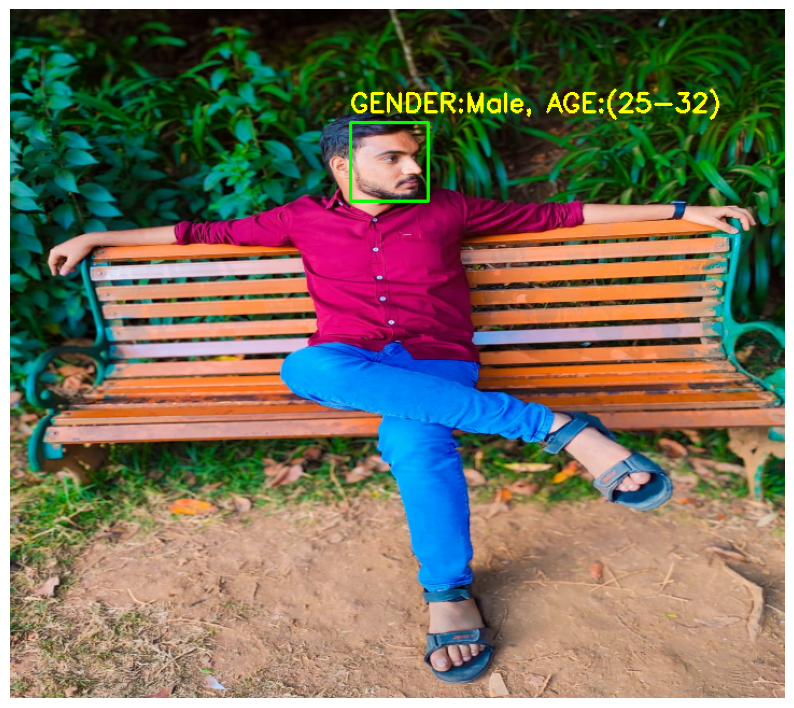

In [62]:
# Display the output image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()